In [1]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train = df_train.drop(['PassengerId','Name','Ticket'],axis=1)

In [4]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
X_train = df_train.iloc[:,1:]
y_train = df_train['Survived']

In [6]:
## for test data
X_test = pd.read_csv('test.csv')

In [7]:
X_test = X_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [8]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


## Feature engineering - Filling Nan value

In [9]:
# for train
X_train['Embarked'] = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
# for test
X_test['Embarked'] = X_test.Embarked.fillna(X_test['Embarked'].value_counts().index[0])

In [10]:
# for train
X_train['Age'] = X_train.Age.fillna(X_train.Age.median())
# for test
X_test['Age'] = X_test.Age.fillna(X_test.Age.median())

In [11]:
# for train
X_train['Cabin'] = X_train.Cabin.fillna('Missing')
X_train['Cabin'] = X_train.Cabin.astype(str).str[0]
X_train['Cabin'] = X_train['Cabin'].replace(['M'],X_train.Cabin.value_counts().index[1])
T_index = X_train.index[X_train['Cabin'] == 'T'][0]
# for test
X_test['Cabin'] = X_test.Cabin.fillna('Missing')
X_test['Cabin'] = X_test.Cabin.astype(str).str[0]
X_test['Cabin'] = X_test['Cabin'].replace(['M'],X_test.Cabin.value_counts().index[1])

In [12]:
T_index

339

In [13]:
X_train = X_train.drop(X_train[X_train.Cabin == 'T'].index)

In [14]:
main_y_train = y_train.drop(y_train.index[T_index])

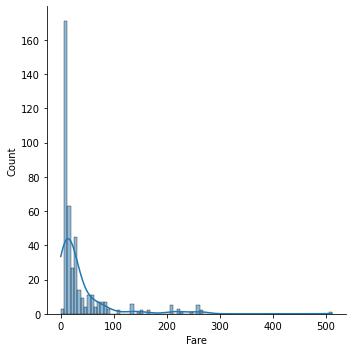

In [15]:
sns.displot(data=X_test,x='Fare',kde=True)

In [16]:
X_test['Fare'] = X_test.Fare.fillna(X_test.Fare.median())

In [17]:
print(X_train.isnull().sum())
print(f'shape: {X_train.shape}')

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64
shape: (890, 8)


In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,C,S
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,C,S
3,1,female,35.0,1,0,53.1000,C,S
4,3,male,35.0,0,0,8.0500,C,S


In [19]:
print(X_test.isnull().sum())
print(f'shape: {X_test.shape}')

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64
shape: (418, 8)


In [20]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,C,Q
1,3,female,47.0,1,0,7.0000,C,S
2,2,male,62.0,0,0,9.6875,C,Q
3,3,male,27.0,0,0,8.6625,C,S
4,3,female,22.0,1,1,12.2875,C,S


In [21]:
main_y_train.shape

(890,)

## Handling Catagorical Features

In [22]:
# for train
X_train_cabin_dummies = pd.get_dummies(X_train['Cabin'],drop_first=True)
X_train_sex_dummies = pd.get_dummies(X_train['Sex'],drop_first=True)
X_train_embarked_dummies = pd.get_dummies(X_train['Embarked'],drop_first=True)

main_X_train = pd.concat([X_train,X_train_cabin_dummies,X_train_sex_dummies,X_train_embarked_dummies],axis=1)

main_X_train = main_X_train.drop(['Cabin','Sex','Embarked'],axis=1)

main_X_train.head()

,Pclass,Age,SibSp,Parch,Fare,B,C,D,E,F,G,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,0,1,0,1


In [23]:
# for test
X_test_cabin_dummies = pd.get_dummies(X_test['Cabin'],drop_first=True)
X_test_sex_dummies = pd.get_dummies(X_test['Sex'],drop_first=True)
X_test_embarked_dummies = pd.get_dummies(X_test['Embarked'],drop_first=True)

main_X_test = pd.concat([X_test,X_test_cabin_dummies,X_test_sex_dummies,X_test_embarked_dummies],axis=1)

main_X_test = main_X_test.drop(['Cabin','Sex','Embarked'],axis=1)

main_X_test.head()

,Pclass,Age,SibSp,Parch,Fare,B,C,D,E,F,G,male,Q,S
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,1,1,0
1,3,47.0,1,0,7.0000,0,1,0,0,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,1,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,1,0,0,0,0,0,0,1


In [24]:
## exporting the train file with target feature
df_train_csv = pd.concat([main_X_train,main_y_train],axis=1)

In [25]:
df_train_csv.to_csv('cleaned_train.csv')
main_X_test.to_csv('cleaned_test.csv')

In [26]:
# train test split in X_train and keeping the x_test for later

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train ,X_test ,y_train ,y_test = train_test_split(main_X_train,main_y_train,test_size=0.3,random_state=0)

### models we can use
1. LogisticRegression
2. XgBoost   ---------------> need tuning
3. RandomForest ------------> need tuning
4. DecisonTree -------------> need tuning
5. KNN
6. Gaussion Navie Bayes ----> need tuning
7. SVM ---------------------> need tuning

#### LogisticRegression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report ,confusion_matrix

In [30]:
lr = LogisticRegression()
lr.fit(X_train ,y_train)
y_pred = lr.predict(X_test)

In [31]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7865168539325843
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       173
           1       0.72      0.65      0.68        94

    accuracy                           0.79       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.79      0.78       267

[[149  24]
 [ 33  61]]


### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)

In [34]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7415730337078652
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       173
           1       0.63      0.66      0.64        94

    accuracy                           0.74       267
   macro avg       0.72      0.72      0.72       267
weighted avg       0.75      0.74      0.74       267

[[136  37]
 [ 32  62]]


### DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train ,y_train)
y_pred = dt.predict(X_test)

In [37]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7940074906367042
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       173
           1       0.72      0.67      0.70        94

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

[[149  24]
 [ 31  63]]


### RandomForest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [40]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.8089887640449438
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       173
           1       0.74      0.71      0.72        94

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267

[[149  24]
 [ 27  67]]


### Navie Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [43]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7340823970037453
              precision    recall  f1-score   support

           0       0.75      0.90      0.81       173
           1       0.69      0.44      0.54        94

    accuracy                           0.73       267
   macro avg       0.72      0.67      0.67       267
weighted avg       0.73      0.73      0.72       267

[[155  18]
 [ 53  41]]


### SVM

In [44]:
from sklearn.svm import SVC

In [45]:
svm =SVC()
svm.fit(X_train ,y_train)
y_pred = svm.predict(X_test)

In [46]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7228464419475655
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       173
           1       0.74      0.33      0.46        94

    accuracy                           0.72       267
   macro avg       0.73      0.63      0.63       267
weighted avg       0.73      0.72      0.69       267

[[162  11]
 [ 63  31]]


### Xgboost

In [47]:
from xgboost import XGBClassifier

In [48]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

[10:03:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
print(accuracy_score(y_test ,y_pred))
print(classification_report(y_test ,y_pred))
print(confusion_matrix(y_test ,y_pred))

0.7940074906367042
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       173
           1       0.71      0.69      0.70        94

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

[[147  26]
 [ 29  65]]


## Model Accuracy
1. LogisticRegression ------> 0.78
2. XgBoost   ---------------> 0.79
3. RandomForest ------------> 0.80
4. DecisonTree -------------> 0.79
5. KNN ---------------------> 0.74
6. Gaussion Navie Bayes ----> 0.73
7. SVM ---------------------> 0.72

## Hpyerparameter tunning for model

In [50]:
from sklearn.model_selection import RandomizedSearchCV
## function for traning
def RandomSerchCvFunction(estimator ,param,X_train,y_train,X_test,y_test):
    rsc = RandomizedSearchCV(estimator=estimator,param_distributions=param,n_iter=10,n_jobs=-1
                            ,cv=10,verbose=3,scoring='roc_auc')
    rsc.fit(X_train,y_train)
    print("\nBest Estimators...........................")
    print(rsc.best_estimator_)
    print("\nBest Parameters...........................")
    print(rsc.best_params_)
    y_pred = rsc.best_estimator_.predict(X_test)
    print("\nAccuracy...........................")
    print(accuracy_score(y_test ,y_pred))
    print("\nClassification Report...........................")
    print(classification_report(y_test ,y_pred))
    print("\nConfusion Matrics...........................")
    print(confusion_matrix(y_test ,y_pred))

### XGBoost tunning

In [51]:
param={'max_depth':[ 3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [100,120,150,180],
        'seed': [0]
    }

In [52]:
xgb_tunning = XGBClassifier()

In [53]:
RandomSerchCvFunction(xgb_tunning,param,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[10:07:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best Estimators...........................
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=9, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=18,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Best Parameters.................

#### XGB after tunned -------> 0.76

### RandomForest tunning

In [54]:
rf_tunning = RandomForestClassifier()

In [55]:
param = {'n_estimators': [10, 25],
              'max_features': [5, 10],
              'max_depth': [10, 50, None],
              'bootstrap': [True, False]
             }

In [56]:
RandomSerchCvFunction(rf_tunning,param,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
RandomForestClassifier(max_features=10, n_estimators=10)

Best Parameters...........................
{'n_estimators': 10, 'max_features': 10, 'max_depth': None, 'bootstrap': True}

Accuracy...........................
0.7752808988764045

Classification Report...........................
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       173
           1       0.73      0.57      0.64        94

    accuracy                           0.78       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.77      0.78      0.77       267


Confusion Matrics...........................
[[153  20]
 [ 40  54]]


### Accurcy ----------> 0.77

### DecisionTree Tunning

In [57]:
dt_tunning = DecisionTreeClassifier()

In [58]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [59]:
RandomSerchCvFunction(dt_tunning,params,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

Best Parameters...........................
{'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'gini'}

Accuracy...........................
0.7902621722846442

Classification Report...........................
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       173
           1       0.81      0.53      0.64        94

    accuracy                           0.79       267
   macro avg       0.80      0.73      0.75       267
weighted avg       0.79      0.79      0.78       267


Confusion Matrics...........................
[[161  12]
 [ 44  50]]


#### Accuracy ---------> 0.79

### KNN

In [60]:
knn_clf = KNeighborsClassifier()

In [61]:
params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [62]:
RandomSerchCvFunction(knn_clf,params,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
KNeighborsClassifier(metric='manhattan', n_neighbors=9)

Best Parameters...........................
{'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}

Accuracy...........................
0.7602996254681648

Classification Report...........................
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       173
           1       0.66      0.66      0.66        94

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267


Confusion Matrics...........................
[[141  32]
 [ 32  62]]


## Accuracy ----------> 0.76

### Naive Bayes

In [63]:
naive_clf = GaussianNB()

In [64]:
params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [65]:
RandomSerchCvFunction(naive_clf,params,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
GaussianNB(var_smoothing=8.111308307896872e-05)

Best Parameters...........................
{'var_smoothing': 8.111308307896872e-05}

Accuracy...........................
0.7415730337078652

Classification Report...........................
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       173
           1       0.76      0.39      0.52        94

    accuracy                           0.74       267
   macro avg       0.75      0.66      0.67       267
weighted avg       0.74      0.74      0.72       267


Confusion Matrics...........................
[[161  12]
 [ 57  37]]


#### Accuracy ------> 0.74

### SVM

In [67]:
svm_clf = SVC()

In [68]:
param = {'kernel': ['rbf','sigmoid','linear'],
         'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
         'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
        }

In [69]:
RandomSerchCvFunction(svm_clf,param,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
SVC(C=1000, gamma=0.0001)

Best Parameters...........................
{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}

Accuracy...........................
0.7677902621722846

Classification Report...........................
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       173
           1       0.68      0.64      0.66        94

    accuracy                           0.77       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.77      0.77       267


Confusion Matrics...........................
[[145  28]
 [ 34  60]]


#### Accuracy -----------> 0.76

### Logistic Regression

In [70]:
lr_clf =LogisticRegression()

In [71]:
param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    } 
    

In [72]:
RandomSerchCvFunction(lr_clf,param,X_train,y_train,X_test,y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits

Best Estimators...........................
LogisticRegression(C=4.281332398719396, solver='liblinear')

Best Parameters...........................
{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 4.281332398719396}

Accuracy...........................
0.7902621722846442

Classification Report...........................
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       173
           1       0.72      0.66      0.69        94

    accuracy                           0.79       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267


Confusion Matrics...........................
[[149  24]
 [ 32  62]]


#### Accuracy 0.79

## For main Test data Prediction


In [78]:
dt_classifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [79]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [81]:
import pickle
pickle.dump(dt_classifier,open('DT_Classifier.pkl','wb'))

In [80]:
y_predicted = dt_classifier.predict(main_X_test)

### Create sample submission file

In [84]:
pred = pd.DataFrame(y_predicted)
sub_df = pd.read_csv('gender_submission.csv')
datasets = pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('Gender_submission_mine.csv',index=False)